## Data Preparation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
tmax = pd.read_csv('tmax.csv')
tmin = pd.read_csv('tmin.csv')
covid = pd.read_csv('covid.csv')

In [46]:
tmax.head()

,State,Country,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,Hubei,China,30.9756,112.2707,5,10,9,12,8,3,...,25,26,27,29,27,20,24,24,25,22


In [47]:
tmax = tmax.drop(columns = ['State','Country','Lat','Long'])
tmin = tmin.drop(columns = ['State','Country','Lat','Long'])

In [48]:
tmax.head()

,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,5,10,9,12,8,3,10,4,4,4,...,25,26,27,29,27,20,24,24,25,22


In [49]:
tmax =tmax.transpose()
tmin = tmin.transpose()

In [26]:
tmax.to_csv('transpose_tmax.csv')
tmin.to_csv('transpose_tmin.csv')

In [4]:
tmax = pd.read_csv('transpose_tmax.csv')
tmin = pd.read_csv('transpose_tmin.csv')

## Ploting

In [57]:
tmax.head()

,Date,max
0,1/22/20,9
1,1/23/20,8
2,1/24/20,6
3,1/25/20,7
4,1/26/20,6


In [58]:
tmin.head()

,Date,min
0,1/22/20,3
1,1/23/20,5
2,1/24/20,2
3,1/25/20,2
4,1/26/20,0


In [59]:
covid.head()

,ObservationDate,Confirmed
0,01/22/2020,444
1,01/23/2020,444
2,01/24/2020,549
3,01/25/2020,761
4,01/26/2020,1058


In [53]:
covid = covid.drop(columns = ['sno'])

In [60]:
covid.head()

,ObservationDate,Confirmed
0,01/22/2020,444
1,01/23/2020,444
2,01/24/2020,549
3,01/25/2020,761
4,01/26/2020,1058


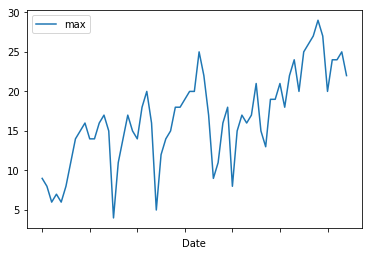

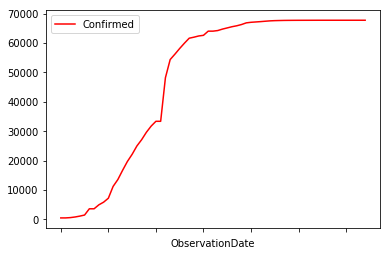

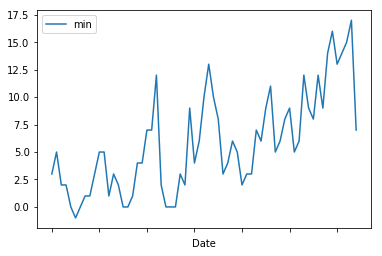

In [75]:
#plt.plot( 'Date', 'max', data=tmax, marker='', color='blue', linewidth=2)
#plt.plot( 'ObservationDate', 'Confirmed', data=covid, marker='', color='red', linewidth=4)
#plt.plot( 'Date', 'min', data=tmin, marker='', color='blue', linewidth=2)
tmax.plot(kind='line',x='Date',y='max')
covid.plot(kind ='line',x='ObservationDate',y='Confirmed',color='red')
tmin.plot(kind='line',x='Date',y='min')

In [5]:
covid_new = tmin.join(tmax['max'])

In [6]:
covid_new.head()

,Date,min,max
0,1/22/20,3,9
1,1/23/20,5,8
2,1/24/20,2,6
3,1/25/20,2,7
4,1/26/20,0,6


In [9]:
covid_new = covid_new.join(covid['Confirmed'])

In [12]:
covid_new.head()

,Date,min,max,Confirmed
0,1/22/20,3,9,444
1,1/23/20,5,8,444
2,1/24/20,2,6,549
3,1/25/20,2,7,761
4,1/26/20,0,6,1058


## Trying Mahchine learning 
This data is irrelavanet for machine learning

In [13]:
from sklearn.linear_model import LogisticRegression

In [34]:
covid_new.drop('Confirmed',axis=1).head()

,Date,min,max
0,1/22/20,3,9
1,1/23/20,5,8
2,1/24/20,2,6
3,1/25/20,2,7
4,1/26/20,0,6


In [26]:
covid_new['Confirmed'].head()

0     444
1     444
2     549
3     761
4    1058
Name: Confirmed, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [36]:
X = covid_new.drop(columns=['Date','Confirmed'])
y = covid_new['Confirmed']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,
                                                   random_state=101)

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
prediction = logmodel.predict(X_test)

In [41]:
prediction

array([ 3554, 67800, 67743, 67800, 67800, 67801, 67800, 67800, 67800,
       67800, 67800, 67800,  3554, 67790, 67800, 67800, 67800,  3554,
       67800,  3554], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
accuracy = confusion_matrix(y_test,prediction)

In [44]:
accuracy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0,

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.1

In [48]:
prediction

array([ 3554, 67800, 67743, 67800, 67800, 67801, 67800, 67800, 67800,
       67800, 67800, 67800,  3554, 67790, 67800, 67800, 67800,  3554,
       67800,  3554], dtype=int64)